In [9]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2, style="whitegrid", font="sans-serif")

## CCNA Book

In [4]:
def get_info(filepath):
    """
    """
    words = []
    with open(filepath) as myfile:
        for count_sent, line in enumerate(myfile):
            words.extend(line.split())
        vocab = set(words)
        print("File: {}".format(filepath))
        print("   Total number of sentences: {}".format(count_sent))
        print("   Total number of words: {}".format(len(words)))
        print("   Size of the vocabulary (unique words): {}".format(len(vocab)))
        print("   Size of the file: {:2f} MB".format(os.path.getsize(filepath)/(1024*1024)))

file = '/raid/antoloui/Master-thesis/_data/information_retrieval/Cisco_CCNA_cleaned_without_QA.raw'
get_info(file)

File: /raid/antoloui/Master-thesis/_data/information_retrieval/Cisco_CCNA_cleaned_without_QA.raw
   Total number of sentences: 13465
   Total number of words: 308466
   Size of the vocabulary (unique words): 20986
   Size of the file: 1.782445 MB


## QA dataset

In [5]:
# Load dataframe.
filepath = '/raid/antoloui/Master-thesis/_data/information_retrieval/questions.csv'
df = pd.read_csv(filepath, sep=";")
df

,Question,QuestionType,Answer,AnswerType
0,Which protocols are examples of TCP/IP transpo...,Knowledge,UDP;TCP,Multiple
1,Which protocols are examples of TCP/IP data li...,Knowledge,Ethernet;PPP,Multiple
2,The process of HTTP asking TCP to send some da...,Knowledge,Adjacent-layer interaction,Unique
3,The process of TCP on one computer marking a T...,Knowledge,Same-layer interaction,Unique
4,The process of a web server adding a TCP heade...,Knowledge,Data encapsulation,Unique
...,...,...,...,...
194,Imagine a Cisco router model X. Cisco produced...,Scenario,>3,Unique
195,What is the name of the new Cisco IOS image fi...,Knowledge,Universal,Unique
196,What command enables you to show the UDI of yo...,Knowledge,show license udi,Unique
197,What is a CLI command on a router that is usef...,Knowledge,license install url,Unique


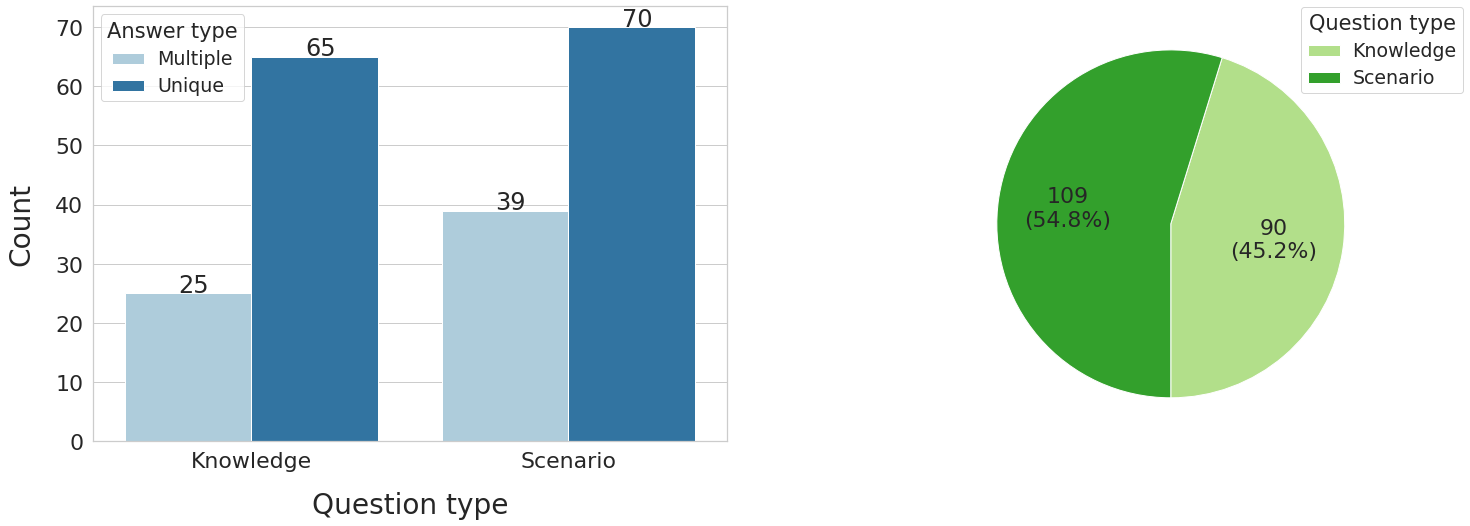

In [61]:
fig = plt.figure(figsize=(25,8))

# Create countplot.
ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.countplot(x="QuestionType", hue="AnswerType", data=df, palette="Paired")
for p in ax1.patches:
    ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.17, p.get_height()+0.2))
ax1.legend(title="Answer type", loc="upper left", fontsize='16')
plt.setp(ax1.get_legend().get_texts(), fontsize='19') # for legend text
plt.setp(ax1.get_legend().get_title(), fontsize='21') # for legend title
plt.xlabel('Question type', fontsize=28, labelpad=20)
plt.ylabel('Count', fontsize=28, labelpad=20)


# Create pie chart.
ax2 = fig.add_subplot(1, 2, 2)
questions = df.groupby('QuestionType').size()
questions.plot(kind='pie', 
               ax=ax2, 
               autopct=lambda p: '{:,.0f}\n({:.1f}%)'.format(p * sum(questions)/100, p), 
               startangle=270, 
               fontsize=22, 
               labels=None, 
               colors=sns.color_palette("Paired")[2:4])
ax2.set_ylabel('')
ax2.legend(title= 'Question type', loc=(0.8,0.8), labels=df.QuestionType.unique().tolist(), fontsize='16')
plt.setp(ax2.get_legend().get_texts(), fontsize='19') # for legend text
plt.setp(ax2.get_legend().get_title(), fontsize='21') # for legend title

# Save and show the plot.
plt.savefig("./figures/questions_stats.pdf", bbox_inches='tight')
plt.show()